Connected to MySQL database


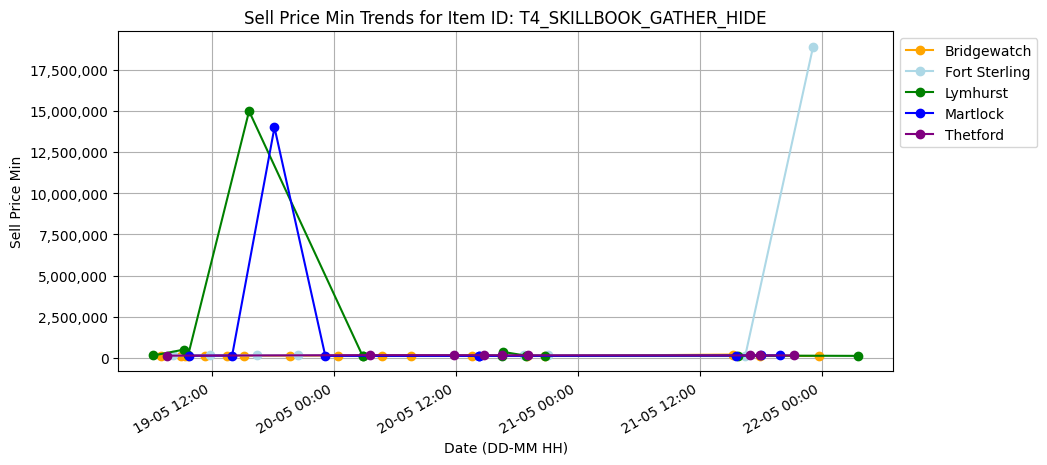

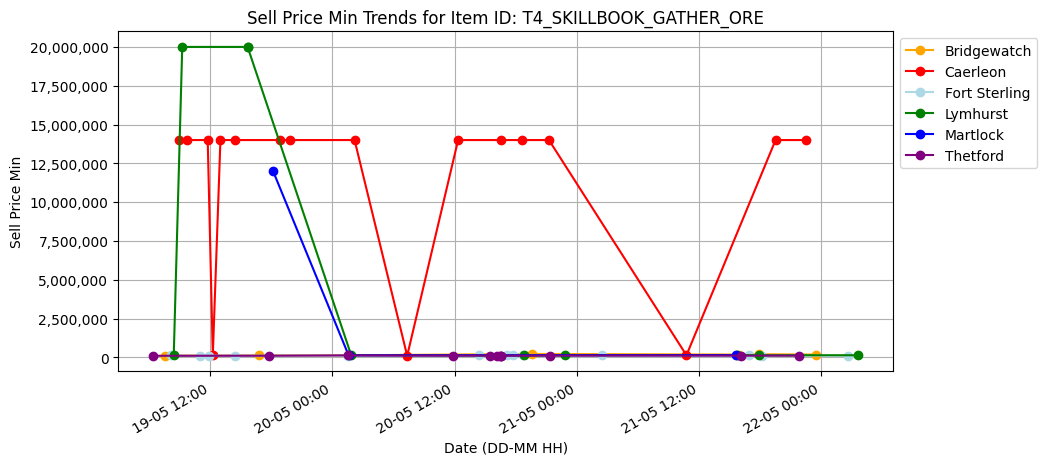

MySQL connection is closed


In [1]:
import mysql.connector
from mysql.connector import Error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from matplotlib.ticker import FuncFormatter


try:
    # Establish a database connection
    db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="val094256",
    database="albion"
)

    if db.is_connected():
        print("Connected to MySQL database")

        # Create a cursor object
        cursor = db.cursor()

        # Define the query
        query = """
        SELECT 
            item_id, city, quality, sell_price_min, sell_price_min_date, 
            sell_price_max, sell_price_max_date, buy_price_min, buy_price_min_date, 
            buy_price_max, buy_price_max_date, updated_date 
        FROM 
            current_data
        
        where city != 'Caerleon' AND city != '0'
        and item_id = 'T4_SKILLBOOK_GATHER_HIDE' or item_id = 'T4_SKILLBOOK_GATHER_ORE'
            
        """

        # Execute the query
        cursor.execute(query)

        # Fetch all rows from the executed query
        result = cursor.fetchall()

        # Convert the result to a pandas DataFrame
        df = pd.DataFrame(result, columns=[
            'item_id', 'city', 'quality', 'sell_price_min', 'sell_price_min_date', 
            'sell_price_max', 'sell_price_max_date', 'buy_price_min', 'buy_price_min_date', 
            'buy_price_max', 'buy_price_max_date', 'updated_date'
        ])

        def thousands_separator(x, pos):
            return '{:,.0f}'.format(x)
        
        # Convert date columns to datetime with error handling
        df['sell_price_min_date'] = pd.to_datetime(df['sell_price_min_date'], errors='coerce')

        # Plot data for each item_id
        item_ids = df['item_id'].unique()
        for item_id in item_ids:
            item_data = df[df['item_id'] == item_id]
            cities = item_data['city'].unique()
            plt.figure(figsize=(10, 5))

            for city in cities:
                city_data = item_data[item_data['city'] == city]
                if city == 'Thetford':
                    color = 'purple'
                elif city == 'Fort Sterling':
                    color = 'lightblue'
                elif city == 'Lymhurst':
                    color = 'green'
                elif city == 'Bridgewatch':
                    color = 'orange'
                elif city == 'Martlock':
                    color = 'blue'
                elif city == 'Caerleon':
                    color = 'red'
                else:
                    color = 'black'  # default color
                plt.plot(city_data['sell_price_min_date'], city_data['sell_price_min'], label=city, marker='o', color=color)


            plt.xlabel('Date (DD-MM HH)')
            plt.ylabel('Sell Price Min')
            plt.title(f'Sell Price Min Trends for Item ID: {item_id}')
            plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
            plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
            plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
            plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_separator))  # Format y-axis label with thousands separator
            plt.gcf().autofmt_xdate()  # Rotation of x-axis labels for better readability

            plt.grid(True)
            plt.show()

except Error as e:
    print("Error while connecting to MySQL", e)

finally:
    if db.is_connected():
        cursor.close()
        db.close()
        print("MySQL connection is closed")


Connected to MySQL database


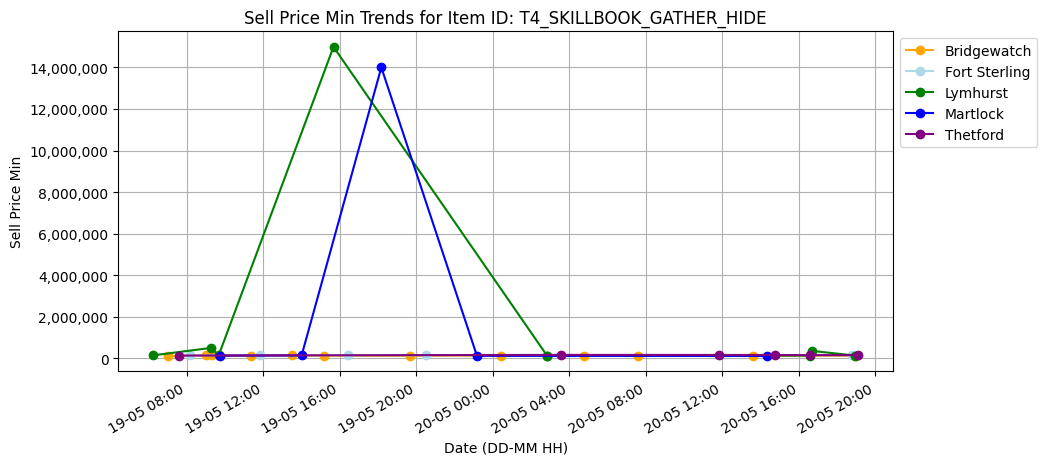

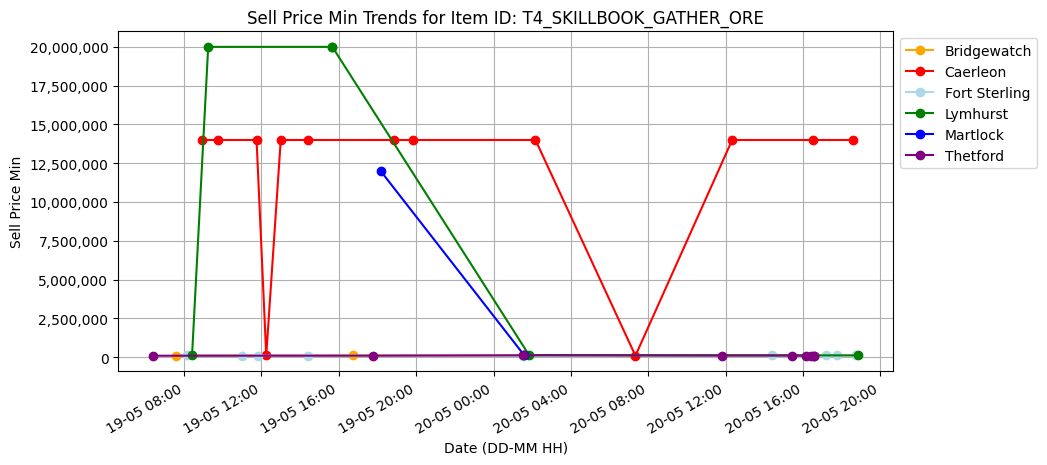

MySQL connection is closed


In [14]:
import mysql.connector
from mysql.connector import Error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from matplotlib.ticker import FuncFormatter
import json

def load_json(file_path):
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
            return data
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None
    except json.JSONDecodeError:
        print(f"Error decoding JSON from file: {file_path}")
        return None

# Specify the path to the JSON file
json_file_path = 'db_config.json'

# Load the JSON data
db_config = load_json(json_file_path)

try:
    # Establish a database connection
    db = mysql.connector.connect(
        host=db_config.get("host"),
        user=db_config.get("user"),
        password=db_config.get("password"),
        database=db_config.get("database")
    )

    if db.is_connected():
        print("Connected to MySQL database")

        # Create a cursor object
        cursor = db.cursor()

        # Define the query
        query = """
        SELECT 
            item_id, city, quality, sell_price_min, sell_price_min_date, 
            sell_price_max, sell_price_max_date, buy_price_min, buy_price_min_date, 
            buy_price_max, buy_price_max_date, updated_date 
        FROM 
            current_data
        
        where city != 'Caerleon' AND city != '0'
        and item_id = 'T4_SKILLBOOK_GATHER_HIDE' or item_id = 'T4_SKILLBOOK_GATHER_ORE'
            
        """

        # Execute the query
        cursor.execute(query)

        # Fetch all rows from the executed query
        result = cursor.fetchall()

        # Convert the result to a pandas DataFrame
        df = pd.DataFrame(result, columns=[
            'item_id', 'city', 'quality', 'sell_price_min', 'sell_price_min_date', 
            'sell_price_max', 'sell_price_max_date', 'buy_price_min', 'buy_price_min_date', 
            'buy_price_max', 'buy_price_max_date', 'updated_date'
        ])

        def thousands_separator(x, pos):
            return '{:,.0f}'.format(x)
        
        # Convert date columns to datetime with error handling
        df['sell_price_min_date'] = pd.to_datetime(df['sell_price_min_date'], errors='coerce')

        # Plot data for each item_id
        item_ids = df['item_id'].unique()
        for item_id in item_ids:
            item_data = df[df['item_id'] == item_id]
            cities = item_data['city'].unique()
            plt.figure(figsize=(10, 5))

            for city in cities:
                city_data = item_data[item_data['city'] == city]
                if city == 'Thetford':
                    color = 'purple'
                elif city == 'Fort Sterling':
                    color = 'lightblue'
                elif city == 'Lymhurst':
                    color = 'green'
                elif city == 'Bridgewatch':
                    color = 'orange'
                elif city == 'Martlock':
                    color = 'blue'
                elif city == 'Caerleon':
                    color = 'red'
                else:
                    color = 'black'  # default color
                plt.plot(city_data['sell_price_min_date'], city_data['sell_price_min'], label=city, marker='o', color=color)


            plt.xlabel('Date (DD-MM HH)')
            plt.ylabel('Sell Price Min')
            plt.title(f'Sell Price Min Trends for Item ID: {item_id}')
            plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
            plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
            plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
            plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_separator))  # Format y-axis label with thousands separator
            plt.gcf().autofmt_xdate()  # Rotation of x-axis labels for better readability

            plt.grid(True)
            plt.show()

except Error as e:
    print("Error while connecting to MySQL", e)

finally:
    if db.is_connected():
        cursor.close()
        db.close()
        print("MySQL connection is closed")


Connected to MySQL database


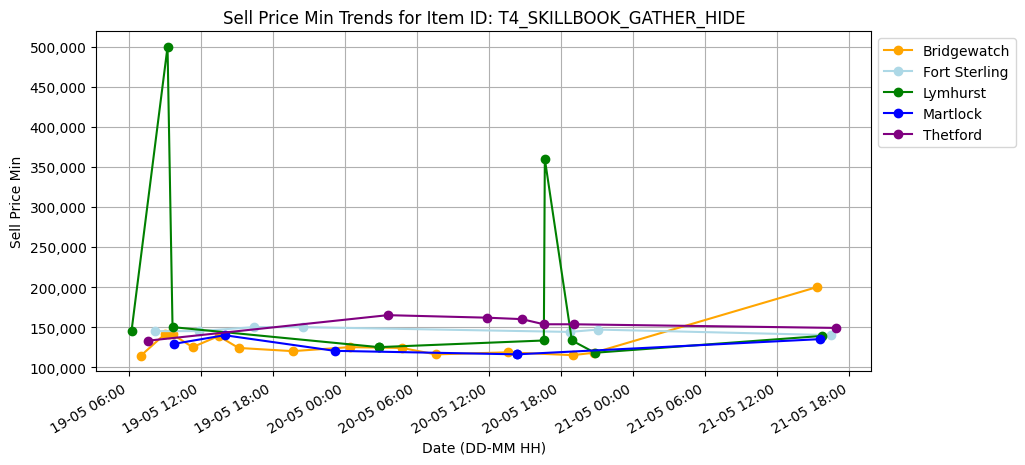

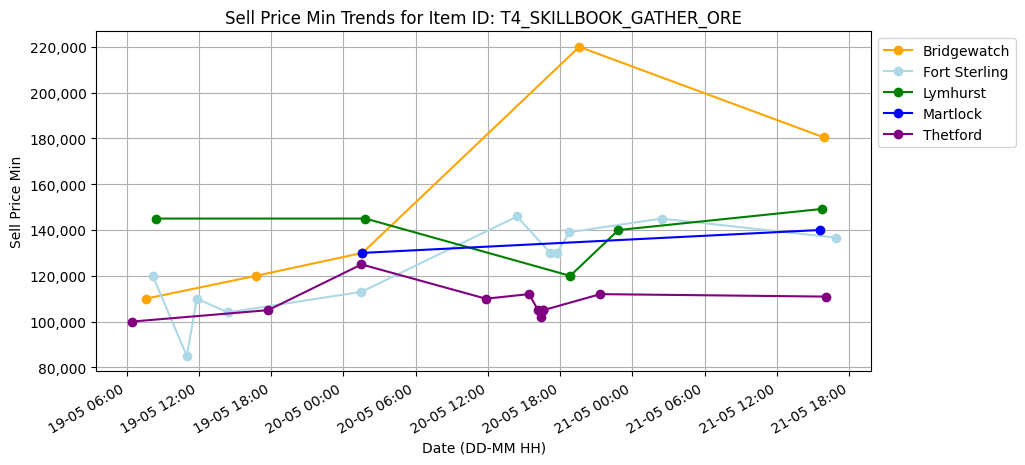

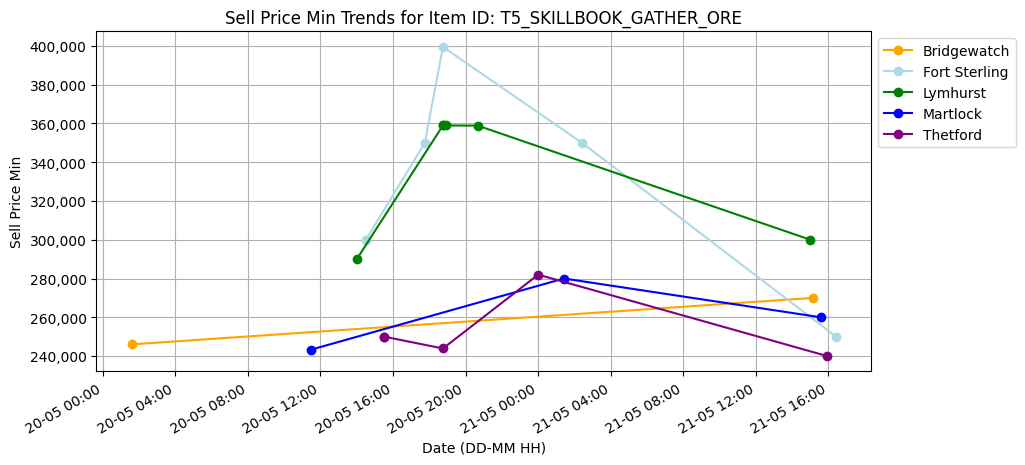

MySQL connection is closed


In [1]:
import mysql.connector
from mysql.connector import Error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from matplotlib.ticker import FuncFormatter
import json
import numpy as np

def load_json(file_path):
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
            return data
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None
    except json.JSONDecodeError:
        print(f"Error decoding JSON from file: {file_path}")
        return None

# Specify the path to the JSON file
json_file_path = 'db_config.json'

# Load the JSON data
db_config = load_json(json_file_path)

try:
    # Establish a database connection
    db = mysql.connector.connect(
        host=db_config.get("host"),
        user=db_config.get("user"),
        password=db_config.get("password"),
        database=db_config.get("database")
    )

    if db.is_connected():
        print("Connected to MySQL database")

        # Create a cursor object
        cursor = db.cursor()

        # Define the query
        query = """
        SELECT 
            item_id, city, quality, sell_price_min, sell_price_min_date, 
            sell_price_max, sell_price_max_date, buy_price_min, buy_price_min_date, 
            buy_price_max, buy_price_max_date, updated_date 
        FROM 
            current_data
        
        WHERE city != 'Caerleon' AND city != '0'
        AND (item_id = 'T4_SKILLBOOK_GATHER_HIDE' OR item_id = 'T4_SKILLBOOK_GATHER_ORE' or 'T5_SKILLBOOK_GATHER_HIDE' OR item_id = 'T5_SKILLBOOK_GATHER_ORE')
        """

        # Execute the query
        cursor.execute(query)

        # Fetch all rows from the executed query
        result = cursor.fetchall()

        # Convert the result to a pandas DataFrame
        df = pd.DataFrame(result, columns=[
            'item_id', 'city', 'quality', 'sell_price_min', 'sell_price_min_date', 
            'sell_price_max', 'sell_price_max_date', 'buy_price_min', 'buy_price_min_date', 
            'buy_price_max', 'buy_price_max_date', 'updated_date'
        ])

        def thousands_separator(x, pos):
            return '{:,.0f}'.format(x)
        
        # Convert date columns to datetime with error handling
        df['sell_price_min_date'] = pd.to_datetime(df['sell_price_min_date'], errors='coerce')

        # Filter out outliers greater than 200,000
        df = df[df['sell_price_min'] <= 700000]

        # Plot data for each item_id
        item_ids = df['item_id'].unique()
        for item_id in item_ids:
            item_data = df[df['item_id'] == item_id]
            cities = item_data['city'].unique()
            plt.figure(figsize=(10, 5))

            for city in cities:
                city_data = item_data[item_data['city'] == city]

                if city == 'Thetford':
                    color = 'purple'
                elif city == 'Fort Sterling':
                    color = 'lightblue'
                elif city == 'Lymhurst':
                    color = 'green'
                elif city == 'Bridgewatch':
                    color = 'orange'
                elif city == 'Martlock':
                    color = 'blue'
                else:
                    color = 'black'  # default color
                
                plt.plot(city_data['sell_price_min_date'], city_data['sell_price_min'], label=city, marker='o', color=color)

            plt.xlabel('Date (DD-MM HH)')
            plt.ylabel('Sell Price Min')
            plt.title(f'Sell Price Min Trends for Item ID: {item_id}')
            plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
            plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
            plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
            plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_separator))  # Format y-axis label with thousands separator
            plt.gcf().autofmt_xdate()  # Rotation of x-axis labels for better readability

            plt.grid(True)
            plt.show()

except Error as e:
    print("Error while connecting to MySQL", e)

finally:
    if db.is_connected():
        cursor.close()
        db.close()
        print("MySQL connection is closed")


Connected to MySQL database


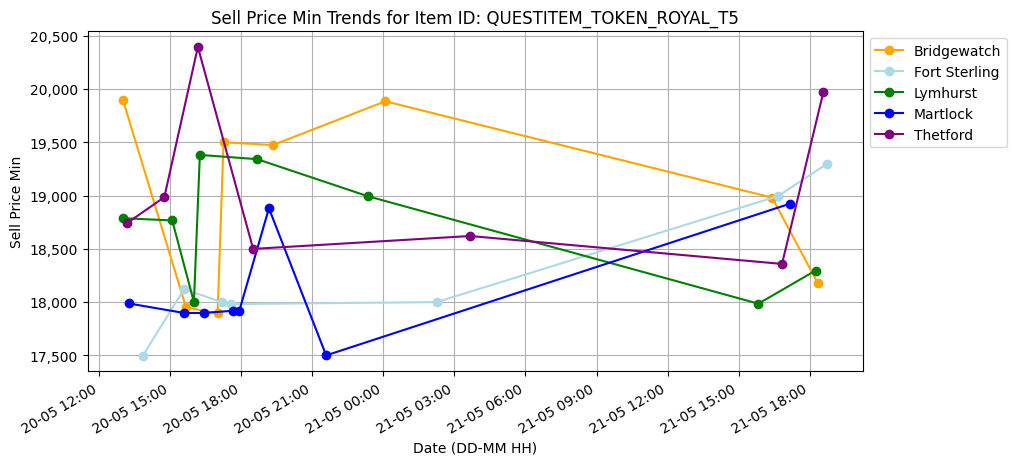

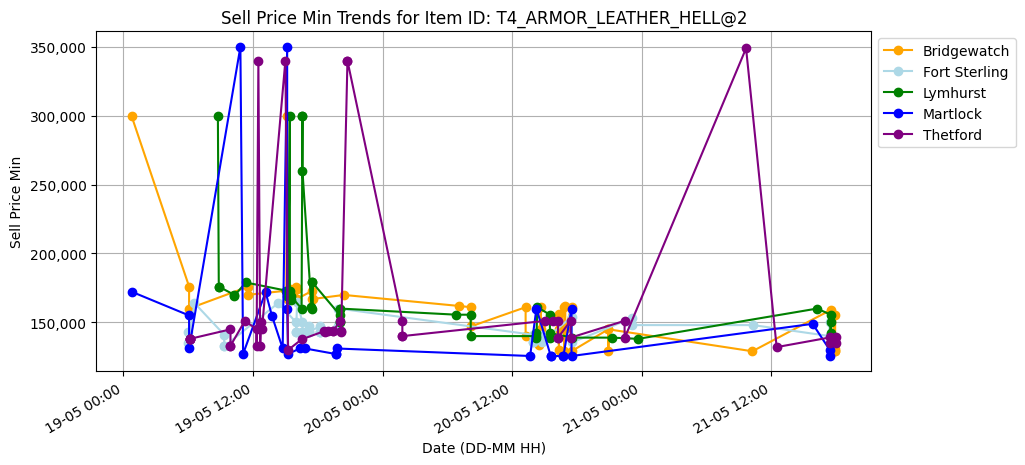

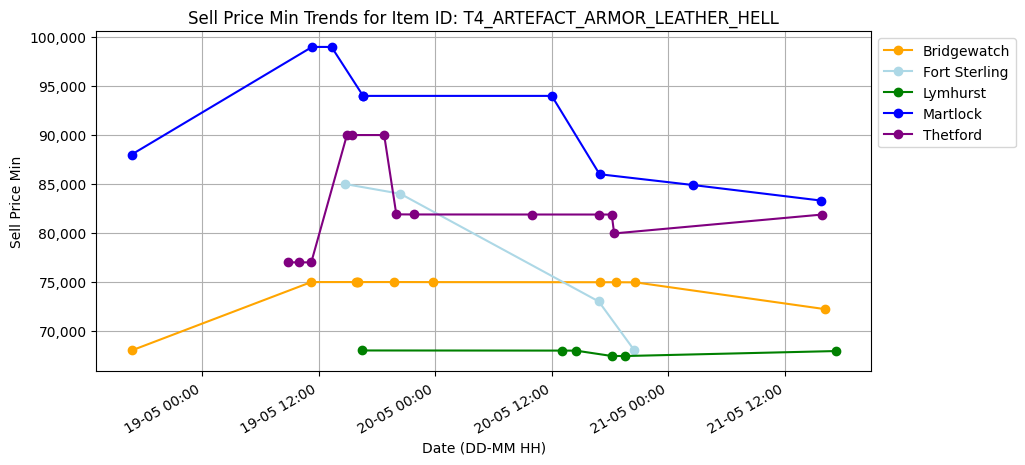

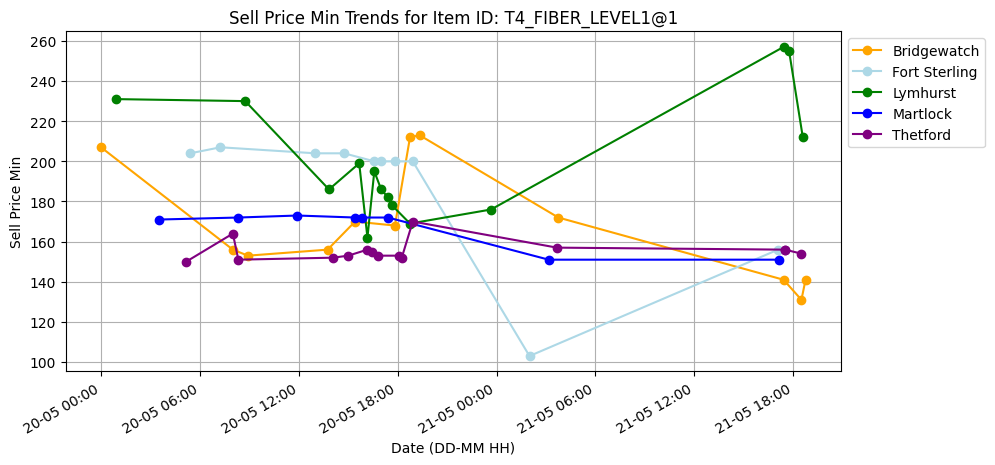

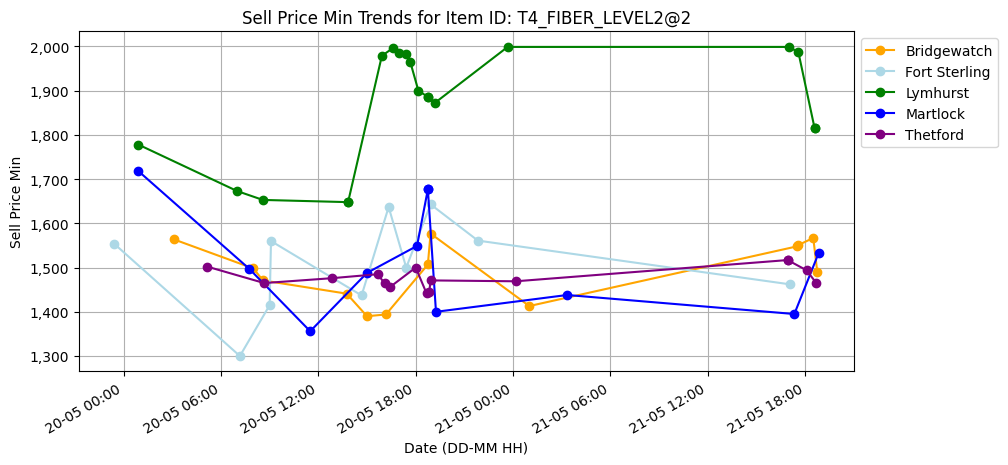

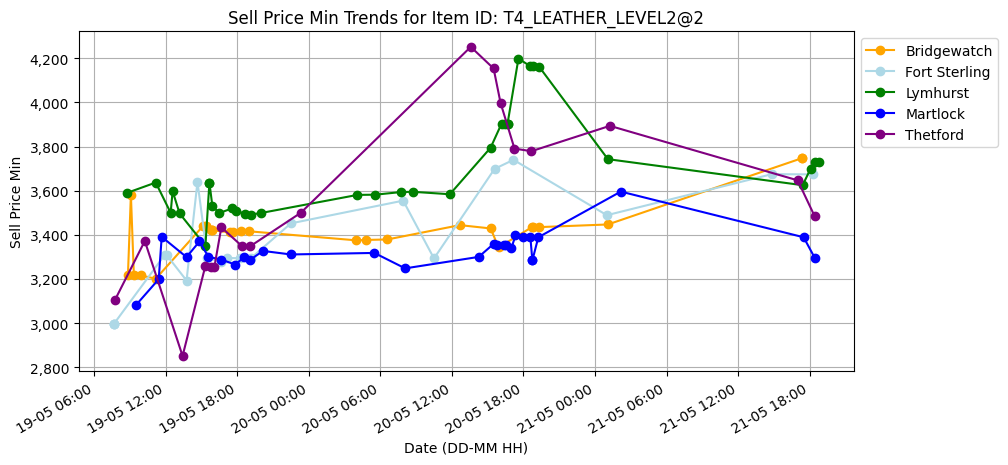

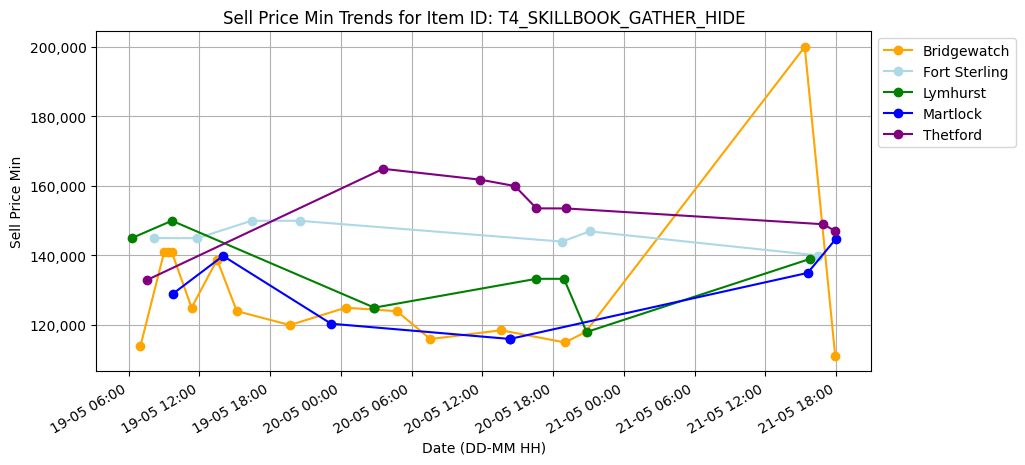

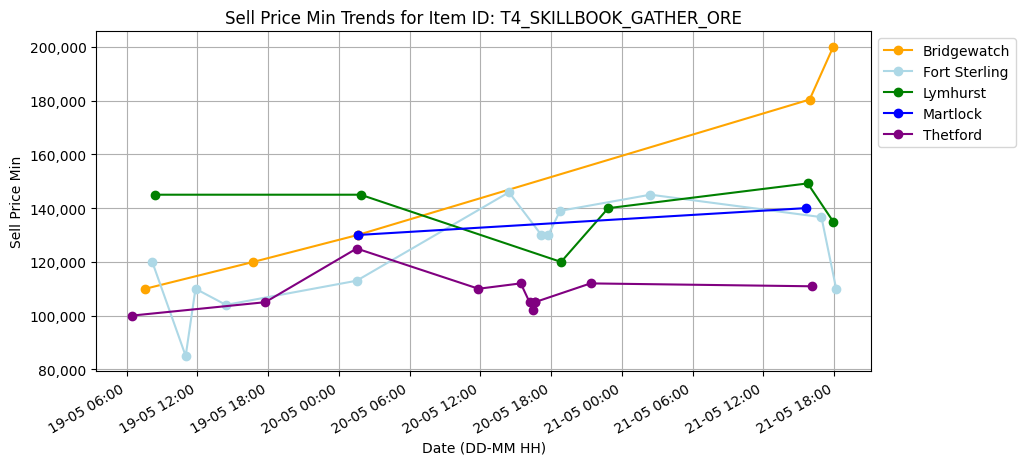

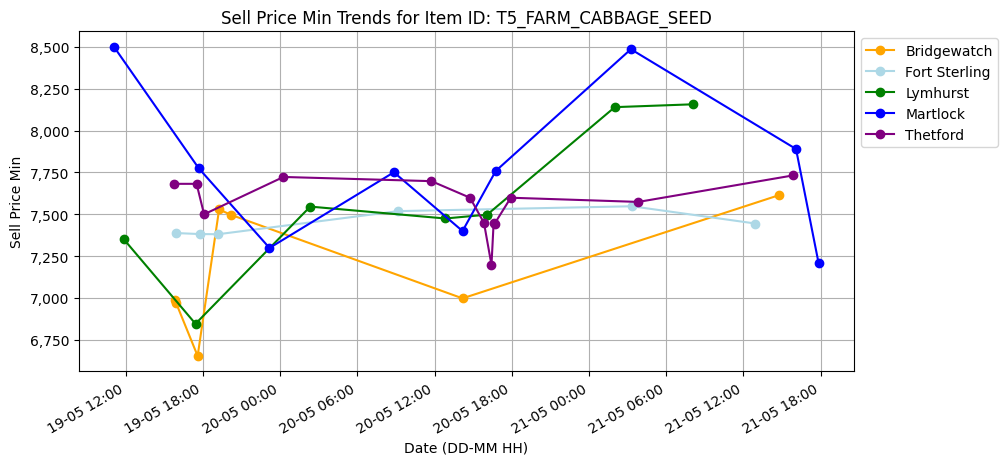

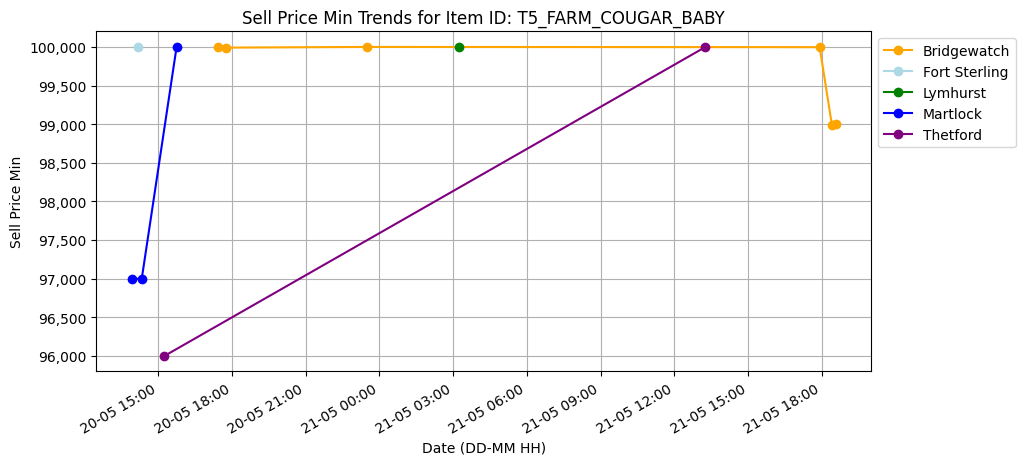

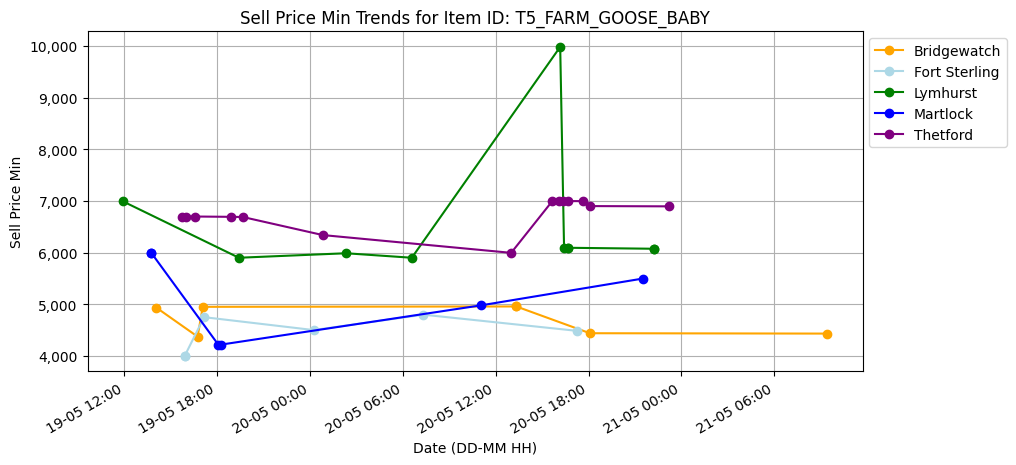

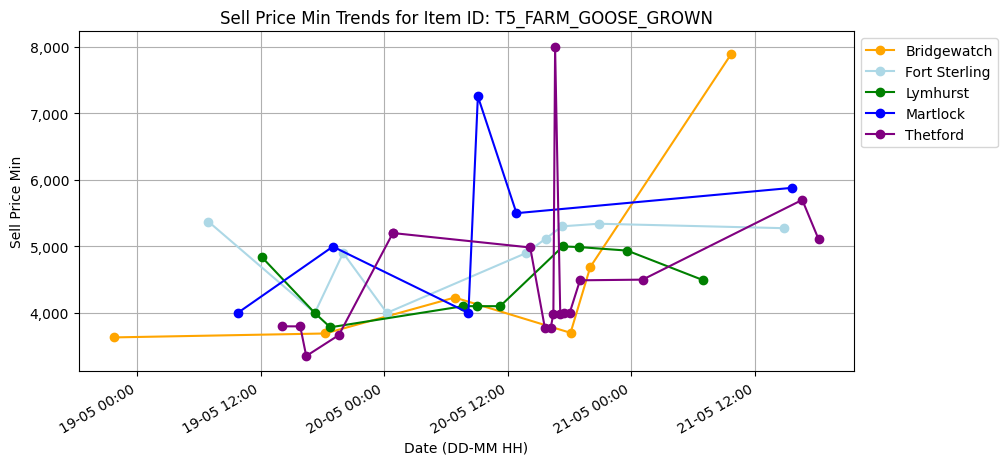

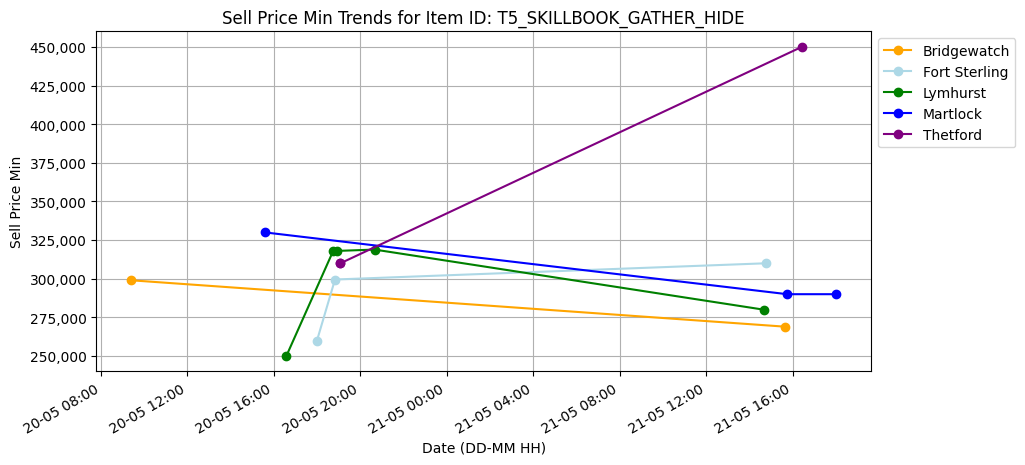

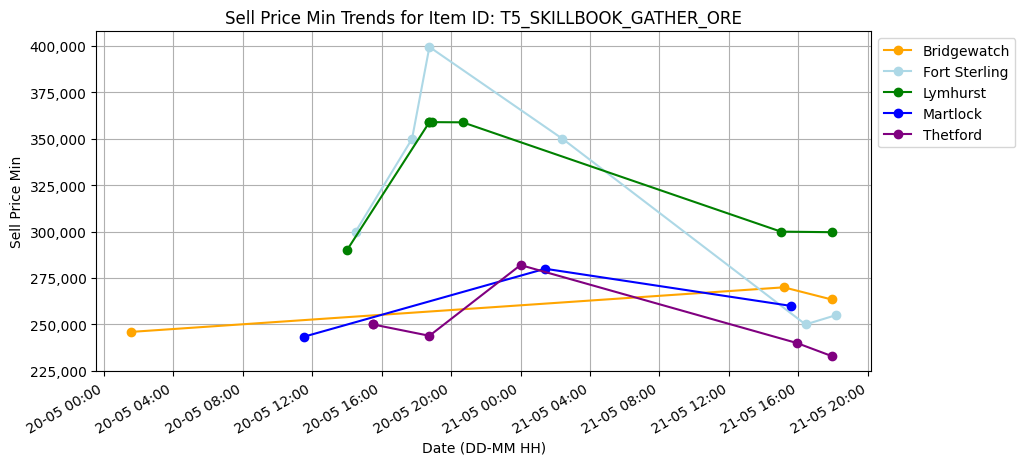

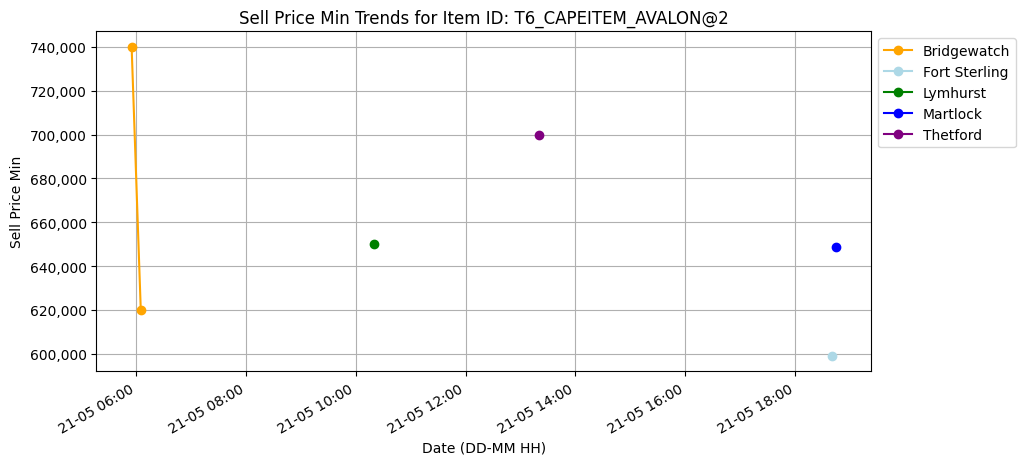

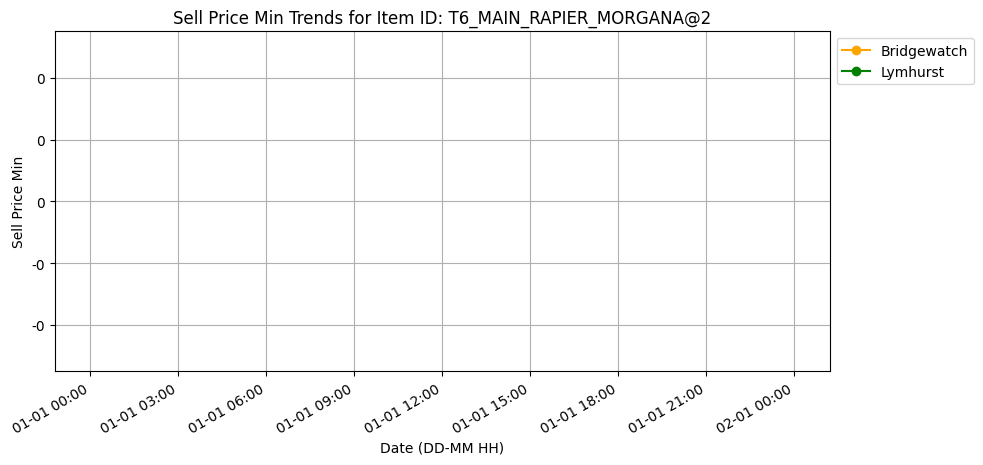

MySQL connection is closed


In [12]:
import mysql.connector
from mysql.connector import Error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from matplotlib.ticker import FuncFormatter
import json
import numpy as np

def load_json(file_path):
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
            return data
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None
    except json.JSONDecodeError:
        print(f"Error decoding JSON from file: {file_path}")
        return None

# Specify the paths to the JSON files
db_config_file_path = 'db_config.json'
outlier_limits_file_path = 'outlier_limits.json'

# Load the JSON data
db_config = load_json(db_config_file_path)
outlier_limits = load_json(outlier_limits_file_path)

if db_config is None or outlier_limits is None:
    print("Failed to load configuration files.")
    exit(1)

try:
    # Establish a database connection
    db = mysql.connector.connect(
        host=db_config.get("host"),
        user=db_config.get("user"),
        password=db_config.get("password"),
        database=db_config.get("database")
    )

    if db.is_connected():
        print("Connected to MySQL database")

        # Create a cursor object
        cursor = db.cursor()

        # Define the query
        query = """
        SELECT 
            item_id, city, quality, sell_price_min, sell_price_min_date, 
            sell_price_max, sell_price_max_date, buy_price_min, buy_price_min_date, 
            buy_price_max, buy_price_max_date, updated_date 
        FROM 
            current_data
        
        WHERE city != 'Caerleon' AND city != '0'
        #AND (item_id = 'T4_SKILLBOOK_GATHER_HIDE' OR item_id = 'T4_SKILLBOOK_GATHER_ORE' OR 'T5_SKILLBOOK_GATHER_HIDE' OR item_id = 'T5_SKILLBOOK_GATHER_ORE')
        """

        # Execute the query
        cursor.execute(query)

        # Fetch all rows from the executed query
        result = cursor.fetchall()

        # Convert the result to a pandas DataFrame
        df = pd.DataFrame(result, columns=[
            'item_id', 'city', 'quality', 'sell_price_min', 'sell_price_min_date', 
            'sell_price_max', 'sell_price_max_date', 'buy_price_min', 'buy_price_min_date', 
            'buy_price_max', 'buy_price_max_date', 'updated_date'
        ])

        def thousands_separator(x, pos):
            return '{:,.0f}'.format(x)
        
        # Convert date columns to datetime with error handling
        df['sell_price_min_date'] = pd.to_datetime(df['sell_price_min_date'], errors='coerce')

        # Plot data for each item_id
        item_ids = df['item_id'].unique()
        for item_id in item_ids:
            # Get the max limit for the current item_id
            max_limit = outlier_limits.get(item_id, float('inf'))
            item_data = df[df['item_id'] == item_id]

            # Filter out outliers greater than the max limit
            item_data = item_data[item_data['sell_price_min'] <= max_limit]

            cities = item_data['city'].unique()
            plt.figure(figsize=(10, 5))

            for city in cities:
                city_data = item_data[item_data['city'] == city]

                if city == 'Thetford':
                    color = 'purple'
                elif city == 'Fort Sterling':
                    color = 'lightblue'
                elif city == 'Lymhurst':
                    color = 'green'
                elif city == 'Bridgewatch':
                    color = 'orange'
                elif city == 'Martlock':
                    color = 'blue'
                else:
                    color = 'black'  # default color
                
                plt.plot(city_data['sell_price_min_date'], city_data['sell_price_min'], label=city, marker='o', color=color)

            plt.xlabel('Date (DD-MM HH)')
            plt.ylabel('Sell Price Min')
            plt.title(f'Sell Price Min Trends for Item ID: {item_id}')
            plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
            plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
            plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
            plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_separator))  # Format y-axis label with thousands separator
            plt.gcf().autofmt_xdate()  # Rotation of x-axis labels for better readability

            plt.grid(True)
            plt.show()

except Error as e:
    print("Error while connecting to MySQL", e)

finally:
    if db.is_connected():
        cursor.close()
        db.close()
        print("MySQL connection is closed")


Connected to MySQL database


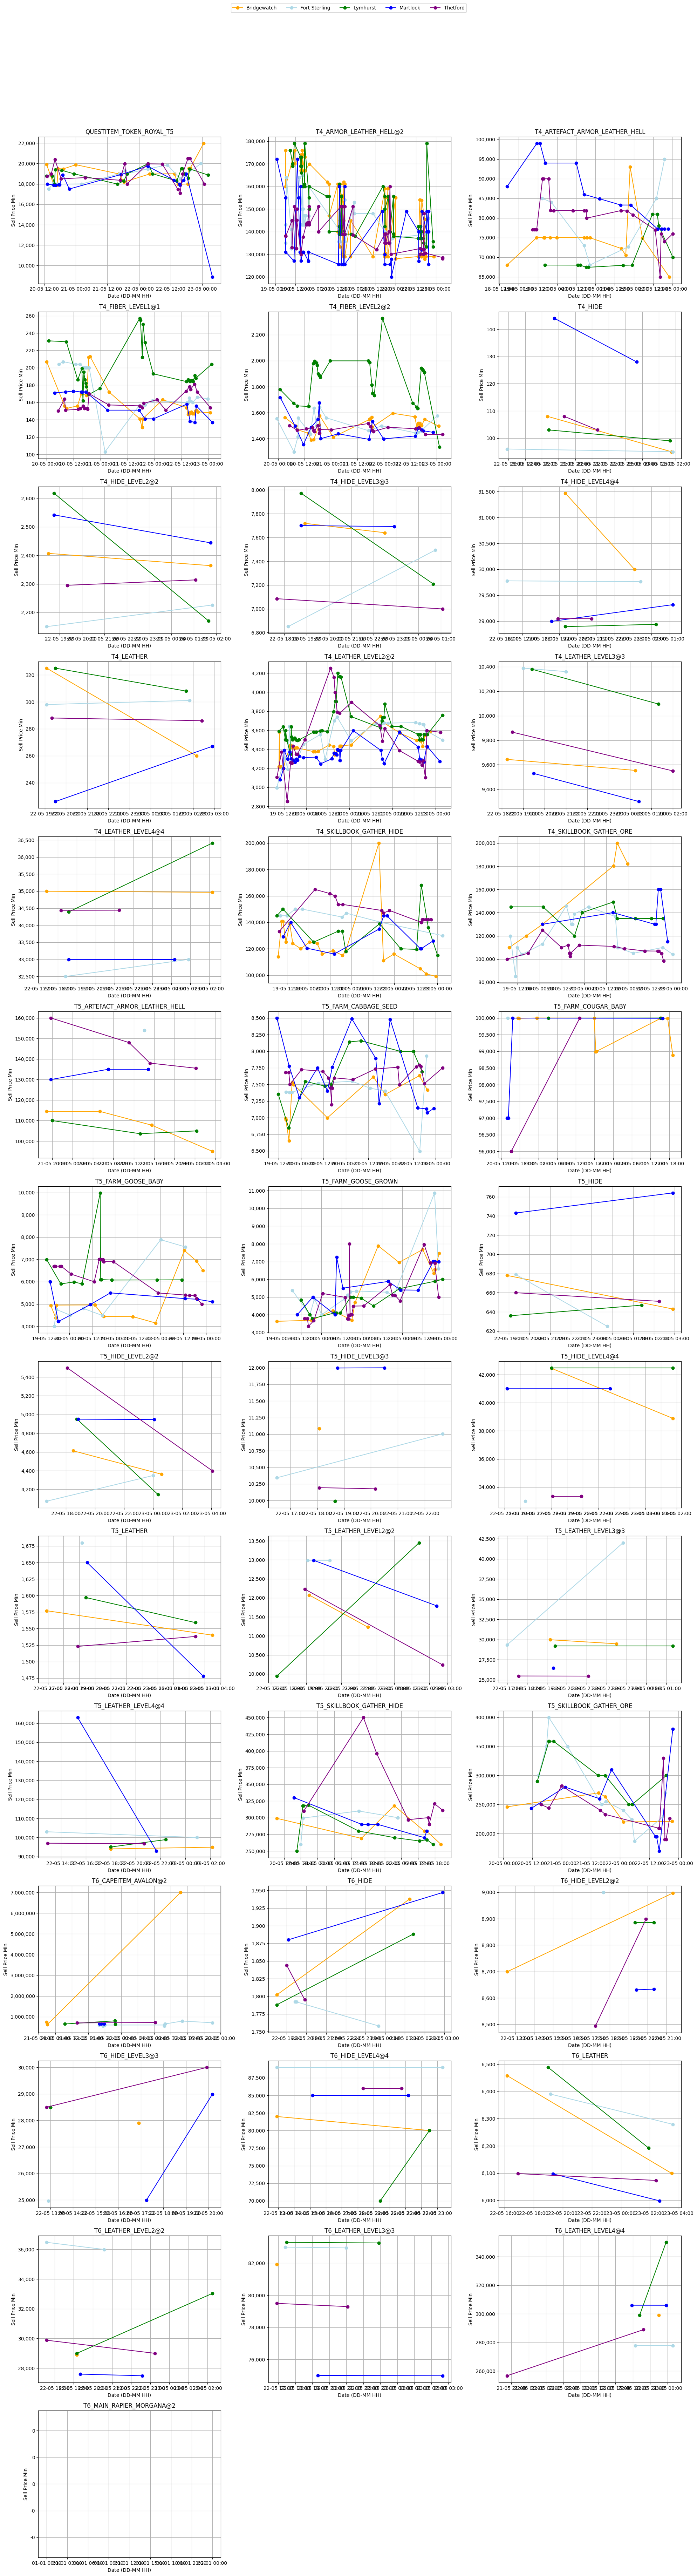

MySQL connection is closed


In [1]:
import mysql.connector
from mysql.connector import Error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from matplotlib.ticker import FuncFormatter
import json
import numpy as np

def load_json(file_path):
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
            return data
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None
    except json.JSONDecodeError:
        print(f"Error decoding JSON from file: {file_path}")
        return None

# Specify the paths to the JSON files
db_config_file_path = 'db_config.json'
outlier_limits_file_path = 'outlier_limits.json'

# Load the JSON data
db_config = load_json(db_config_file_path)
outlier_limits = load_json(outlier_limits_file_path)

if db_config is None or outlier_limits is None:
    print("Failed to load configuration files.")
    exit(1)

try:
    # Establish a database connection
    db = mysql.connector.connect(
        host=db_config.get("host"),
        user=db_config.get("user"),
        password=db_config.get("password"),
        database=db_config.get("database")
    )

    if db.is_connected():
        print("Connected to MySQL database")

        # Create a cursor object
        cursor = db.cursor()

        # Define the query
        query = """
        SELECT 
            item_id, city, quality, sell_price_min, sell_price_min_date, 
            sell_price_max, sell_price_max_date, buy_price_min, buy_price_min_date, 
            buy_price_max, buy_price_max_date, updated_date 
        FROM 
            current_data
        
        WHERE city != 'Caerleon' AND city != '0'
        #AND (item_id = 'T4_SKILLBOOK_GATHER_HIDE' OR item_id = 'T4_SKILLBOOK_GATHER_ORE' OR 'T5_SKILLBOOK_GATHER_HIDE' OR item_id = 'T5_SKILLBOOK_GATHER_ORE')
        """

        # Execute the query
        cursor.execute(query)

        # Fetch all rows from the executed query
        result = cursor.fetchall()

        # Convert the result to a pandas DataFrame
        df = pd.DataFrame(result, columns=[
            'item_id', 'city', 'quality', 'sell_price_min', 'sell_price_min_date', 
            'sell_price_max', 'sell_price_max_date', 'buy_price_min', 'buy_price_min_date', 
            'buy_price_max', 'buy_price_max_date', 'updated_date'
        ])

        def thousands_separator(x, pos):
            return '{:,.0f}'.format(x)
        
        # Convert date columns to datetime with error handling
        df['sell_price_min_date'] = pd.to_datetime(df['sell_price_min_date'], errors='coerce')

        # Plot data for each item_id
        item_ids = df['item_id'].unique()
        num_items = len(item_ids)
        num_columns = 3
        num_rows = (num_items + num_columns - 1) // num_columns  # Compute the number of rows needed

        fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 5))
        axes = axes.flatten()  # Flatten the axes array for easy indexing

        city_colors = {
            'Thetford': 'purple',
            'Fort Sterling': 'lightblue',
            'Lymhurst': 'green',
            'Bridgewatch': 'orange',
            'Martlock': 'blue'
        }

        # To store handles and labels for a single legend
        handles_labels = {}

        for i, item_id in enumerate(item_ids):
            ax = axes[i]
            # Get the max limit for the current item_id
            max_limit = outlier_limits.get(item_id, float('inf'))
            item_data = df[df['item_id'] == item_id]

            # Filter out outliers greater than the max limit
            item_data = item_data[item_data['sell_price_min'] <= max_limit]

            cities = item_data['city'].unique()

            for city in cities:
                city_data = item_data[item_data['city'] == city]
                color = city_colors.get(city, 'black')
                line, = ax.plot(city_data['sell_price_min_date'], city_data['sell_price_min'], label=city, marker='o', color=color)

                # Collect handles and labels for the legend
                handles_labels[city] = line

            ax.set_xlabel('Date (DD-MM HH)')
            ax.set_ylabel('Sell Price Min')
            ax.set_title(f'{item_id}')
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
            ax.xaxis.set_major_locator(mdates.AutoDateLocator())
            ax.yaxis.set_major_formatter(FuncFormatter(thousands_separator))  # Format y-axis label with thousands separator
            ax.grid(True)

        # Hide any unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        # Create a single legend
        fig.legend(handles_labels.values(), handles_labels.keys(), loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=len(city_colors))

        plt.tight_layout()
        plt.show()

except Error as e:
    print("Error while connecting to MySQL", e)

finally:
    if db.is_connected():
        cursor.close()
        db.close()
        print("MySQL connection is closed")
